# Monte Carlo Set 1 
## Karl Jiang 

### 1.13)

The function (routine) to generate the sample averages and plot is below.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

def clt_exp(n, ns = 5000):
    '''
    Generates ns sample averages (x_bars) for sample size n. Plots 
    histogram of the normalized x_bars (z_bars). 
    
    Params: 
        n: the sample size 
        ns: number of samples 
    '''
    x_bars = [] 
    for i in range(ns): 
        xs = np.random.exponential(size = n)
        x_bars.append( np.mean(xs) ) 
    x_bars = np.array(x_bars)
    
    pi_x = 1 #expected value exp(1)
    sigma = 1 #sd of exp(1)
    z_bars =  np.sqrt(n) * ( x_bars - pi_x ) 
    
    #plot 
    #k, bins, patches = plt.hist(z_bars, normed = True)
    #y = mlab.normpdf(bins, pi_x, sigma)
    #l = plt.plot(bins, y, 'r--', linewidth = 1)
    plt.hist(z_bars, normed = True)
    plt.xlabel('x_bar')
    plt.ylabel('Probabillity')
    plt.title('CLT histogram, exp(1), n = {}'.format(n))
    plt.grid(True)

    plt.show()
    #return z_bars

We will show that the histogram tends towards a normal distribution for increasing n. (For 5000 sample averages) 

In [2]:
clt_exp(10)

In [3]:
clt_exp(100)

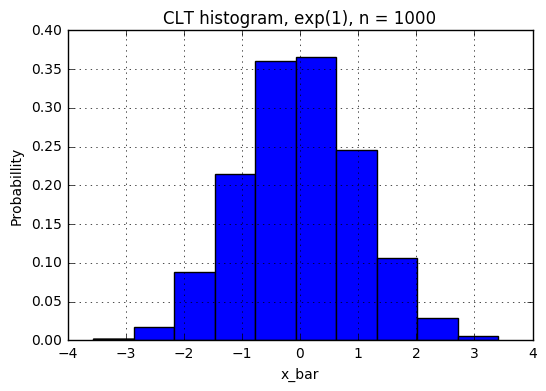

In [4]:
clt_exp(1000)

In [5]:
clt_exp(10000)

As the sampe size increases, the histogram approaches the normal distribution density. 

#### Decay Rate )  

Below is the routine to classify the event $Q_n = \bar{x}_n - \pi x > 0.1$:

In [6]:
def exp_one_deviations(n, epsilon = 0.1): 
    '''
    generates a sample mean (of exp(1) rv's) with sample size n. Returns True if event is satsified
    Params: 
        n - int, number of samples to generate 
        epsilon - the deviation 
    Returns: 
        True if the sample mean > epsilon, False o.w. 
    '''

    mu = 1 
    x_bar = np.mean( np.random.exponential(size = n) ) 
    diff = x_bar - mu
    if x_bar - mu > epsilon: 
       # print(x_bar - mu)
        return True 
    return False 
    

Below is the routine to estimate $\mathbb{P}(\bar{x}_n - \pi x > 0.1)$, which basically just takes the average of a bunch of independent samples of $\bar{x}$ for the event $\bar{x}_n - \pi x > 0.1$ since we are really just finding the parameter $p$ of a bernoulli($p$)

In [7]:
def est_prob(N, n, epsilon = 0.1):
    '''
     Params: 
        N - int, the number of means to generate 
        n - int, number of samples to generate (for sample mean)
        epsilon - int, the deviation 
    Returns: 
        Estimate of the indicator event 
    '''
    rs = []
    for i in range(N):
        rs.append( exp_one_deviations(n, epsilon) )
    #print(rs)
    
    return np.mean(rs)

In [8]:
sample_size = 1000
P = est_prob(100000, sample_size) #simple demonstration that with many samples, chance of 0.1 deviation is pretty much 0.
print(P)

0.00093


To estimate the value obtained from Cramer's Large Deviation principle, we simply take the log of the estimated probabillity and divide by sample size $n$. (As long as $n$ is large): 

In [9]:
est_decay = np.log(P) / sample_size

epsilon = 0.1
actual_decay = -epsilon + np.log(1 + epsilon)

print("est decay: {} \t| actual decay: {}".format(est_decay, actual_decay))

est decay: -0.00698032597182 	| actual decay: -0.00468982019568


#### Comparison with standard deviation 

Since $Q_n$ is  bernoulli $\bar{x} - \pi x > 0.1$ with probabillity $p(n) = \mathbb{P}(\bar{x}_n - \pi x > 0.1)$, where $n$ is the number of samples, then the standard deviation of $Q_n$ is $\sqrt{p(n)(1 - p(n))}$. Therefore, 
<br> 
$$\lim_{n\to\infty} \frac{1}{n} log(\sqrt{p(n)(1 - p(n) )} ) = $$ 
$$\lim_{n\to\infty} \frac{1}{2n} ( log( p(n) ) + log(1 - p(n) ) = $$
$$\lim_{n\to\infty} \frac{1}{2n} log( p(n) ) + \lim_{n\to\infty} \frac{1}{2n} log(1 - p(n) ) = $$ 
<br> And by the law of large numbers, $p(n) \rightarrow 0$ as $n \rightarrow \infty$, thus $log(1 - p(n) )$ will approach $0$ and the second term vanishes. This leaves us with 
$$\lim_{n\to\infty} \frac{1}{2n} log( p(n) ) = \frac{1}{2} \lim_{n\to\infty} \frac{1}{n} log( p(n) ) < \lim_{n\to\infty} \frac{1}{n} log( p(n) )$$ 
<br> 
Thus, the standard deviation of $Q_n$ has a rate of decay that is smaller than the rate of decay of $\mathbb{P}(Q_n)$. This is not ideal. 

### 2.15) The root distribution

Integrating the density $\pi$, we get $F(x) = \sqrt{x}$ for $0 \leq x \leq 1$, thus $F^{-1}(x) = x^{2}$. The histogram that shows the inversion technique is shown below 

In [10]:
def sqrt_density(n):
    '''
    Samples from the 1/(2sqrt(x)) density on [0,1].
    Plots histogram of the random variables drawn from this distribution. 
    Params: 
        n - int, number of samples to be drawn from said density 
    '''
    x = np.random.random(size = n)
    x_trans = np.power(x, 2)

    if n > 1000: 
        plt.hist(x_trans, bins = 25)
    else: 
        plt.hist(x_trans)
    plt.xlabel('x_transformed')
    plt.ylabel('Frequency')
    plt.title('Histogram: 1 / (2sqrt(x) ) on [0,1], {} samples'.format(n))
    plt.grid(True)
    plt.show()
    
    

In [11]:
sqrt_density(100000) #see how it looks like 1 / (2 sqrt(x) ) function 

### 2.17) Mox - Muller Implementation 

We implement the box muler transform below. 2D Histogram follows. 

In [12]:
def box_muller(n): 
    '''
    params: 
        n - int, number of gaussian pairs to be generated 
    returns: 
        numpy 2d array of n independently generated gaussian pairs (all independent) 
    '''
    u1 = np.random.random(n)
    u2 = np.random.random(n)
    
    phi_1 = np.sqrt(-2 * np.log(u1) ) * np.cos(2 * np.pi * u2)
    phi_2 = np.sqrt(-2 * np.log(u1) ) * np.sin(2 * np.pi * u2)
    
    return np.array( [phi_1, phi_2] )
    

In [13]:
def hist_box_muller(n):
    '''
    Generates n pairs of N(0,1) random variables, and plots 2d histogram of the pairs 
    '''
    X = box_muller(n)
    if n > 1000: 
        plt.hist2d(X[0], X[1], bins = 50)
    else: 
        plt.hist2d(X[0], X[1])
    plt.colorbar()
    plt.show()

In [14]:
hist_box_muller(10000)

### 2.18) Generating from the Unit Disk 

The setup is similar to the Box - Muller - except that instead of using the inverse exponential (2), we leave the "radius" unchanged. 

If $U_1$ and $U_2$ are iid $U(0,1)$ distributions, we apply the following transformation to sample any point on the unit square: <br> 
$X = \sqrt{U_1} cos(2\pi U_2)$ and $Y = \sqrt{U_1} sin(2\pi U_2)$ 
<br> 
The function below generates point on the unit circle and function below that plots the 2d histogram. 

In [15]:
def r_unit_circle(n): 
    '''
    Samples (x1, x2) to be uniformally distributed across the unit circle 
    params:
        -n - int, number of points to generate on unit circle 
    returns: 
        n x 2 numpy array where each row (x,y) is a coordinate on the unit circle 
    '''
    u1 = np.random.random(n)
    u2 = np.random.random(n)
    
    phi_1 = np.sqrt(u1) * np.cos(2 * np.pi * u2)
    phi_2 = np.sqrt(u1) * np.sin(2 * np.pi * u2)
    
    return np.array( [phi_1, phi_2] )

In [16]:
def hist_unit_circle(n):
    '''
    Generates n pairs uniformally dist. across unit circle, and plots 2d histogram of the pairs 
    '''
    X = r_unit_circle(n)
    if n > 1000: 
        plt.hist2d(X[0], X[1], bins = 30)
    else: 
        plt.hist2d(X[0], X[1])
    plt.colorbar()
    plt.show()

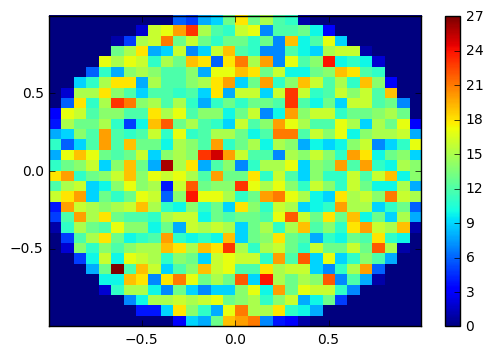

In [17]:
hist_unit_circle(10000)

### 2.19) Rejection Sampling the Unit Circle 

We must choose $K$ such that $K \geq 1$ and $K \geq \frac{\pi}{\widetilde{\pi}}$. 
<br>
$\pi$ is the uniform density on the unit circle, which is $\frac{1}{\pi}$ on support $0 \leq x^2 + y^2 \leq 1$
<br> 
$\widetilde{\pi}$ is the uniform density on the unit square, which is $\frac{1}{4}$ with support $-1 \leq x \leq 1$ and $-1 \leq y \leq 1$
<br> 
Therefore, the "optimal" (or smallest possible value of) $K$ would just be $\frac{4}{\pi}$ 
<br> <br>
The general rejection function (one that takes in densities $\pi$ and $\widetilde{\pi}$ is implemented below: 

In [18]:
def pi_density(x):
    #x is supposed to be a vector / array for any general density. Here its just an (x,y) cooridnate 
    if np.square(x[0]) + np.square(x[1]) <= 1:
        return 1 / np.pi
    return 0 

def unit_sq_density(x):
    #density of unit square 
    if -1 <= x[0] <= 1 and -1 <= x[1] <= 1:   
        return 0.25
    return 0 

def sample_unit_square(n):
    '''
    params: 
        - n: number of points to sample 
    returns: 
        - n x 2 array of (x,y) on unit square
    '''
    samples = [] 
    for i in range(n):
        samples.append( np.random.random(2) * 2 - 1 ) 
    return samples 


In [19]:
def rejection_samples(pi, pi_t, pi_t_sample, k, n): 
    '''
    params: 
        pi - density function that takes in a np.array of ints and maps to scalar.
            Should be the density to sample from 
        pi_t - density function that takes in a np.array of ints and maps to scalar. 
            Should be denisty that can already be sampled from.
        pi_t_sample - generates random variables with distribution pi_t. 
        k - the constant k used in rejection sampling (for condition to not reject)
        n of samples to be drawn from distribution pi
    returns: 
        dictionary with key 'X' and 'Y', each with a list value where a row corresponds to the (x,y) coordinates
    '''
    samples = {'X' : [], 'Y' : []}
    for i in range(n):
        reject = True
        while reject:  
            u = np.random.random(1)[0] 
            y = pi_t_sample(1)[0][:] 
            v = pi(y) / ( k * pi_t(y) )
            condition_met = u <= pi(y) / ( k * pi_t(y) ) 
            if condition_met:  
                #print("u: {}\t| v: {}".format( u, v ) ) 
                reject = False 
                samples['X'].append(y[0])

                samples['Y'].append(y[1])
    return samples 
    

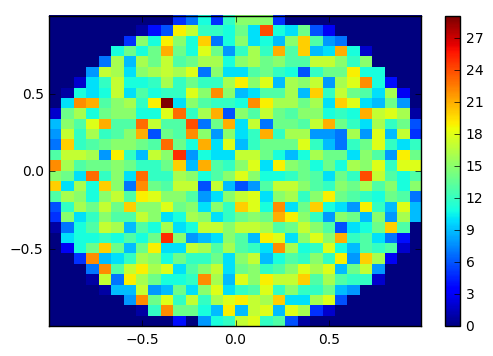

In [20]:
n = 10000
k = 4 / np.pi
rs = rejection_samples(pi_density, unit_sq_density, sample_unit_square, k, n)
if n > 1000: 
    plt.hist2d(rs['X'], rs['Y'], bins = 30)
else: 
    plt.hist2d(rs['X'], rs['Y'])
plt.colorbar()
plt.show()

The cost of rejection sampling is about $K$ times as more as directly generating from the unit disk since $\mathbb{E}[\tau] = K$ 
<br>
Eg. if we wanted to generate $n$ points on the unit circle, then directly generating points would take n iterations, whereas rejection samping would take $Kn$ iterations. 